<a href="https://colab.research.google.com/github/Cordero27/Minor-Machine-Learning/blob/main/Analisis%20Dataset%20Memoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de conjunto de datos preliminar para Memoria

### El Conjunto de datos a estudiar pertenece a la captura de datos de una colmena de abejas durante un año, que se realizó en la ciudad de Würzburg en 2017. Los parámetros trabajados durante el proyecto son flujo de abejas que ingresan y egresan de la colmena, humedad y temperatura interior de la colmena, y peso de esta. Las unidades de medida de estos últimos tres parámetros son porcentaje, Celcius y Kilogramos respectivamente.

### Cabe destacar, que solo se usan los archivos que tienen el año 2017 en su nombre, pues los demas corresponden a un estudio de 2017-2019 que tienen un periodo no medido en el año 2018.

## Para procesar este conjunto de datos se usa OSEMN.

###Entrega 01 - OBTAIN

In [2]:
import numpy as np
#Librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Fuente del dataset: https://www.kaggle.com/datasets/se18m502/bee-hive-metrics

flow = pd.read_csv('https://raw.githubusercontent.com/Cordero27/Minor-Machine-Learning/main/Dataset/flow_2017.csv', on_bad_lines='skip')
humidity = pd.read_csv('https://raw.githubusercontent.com/Cordero27/Minor-Machine-Learning/main/Dataset/humidity_2017.csv', on_bad_lines='skip')
temperature = pd.read_csv('https://raw.githubusercontent.com/Cordero27/Minor-Machine-Learning/main/Dataset/temperature_2017.csv', on_bad_lines='skip')
weight = pd.read_csv('https://raw.githubusercontent.com/Cordero27/Minor-Machine-Learning/main/Dataset/weight_2017.csv', on_bad_lines='skip')

#Observamos el contenido adquirido del archivo del flujo
flow.head()

,timestamp,flow
0,2017-01-01 05:15:00,0
1,2017-01-01 05:16:00,0
2,2017-01-01 05:17:00,0
3,2017-01-01 05:18:00,0
4,2017-01-01 05:19:00,0


In [3]:
#Observamos el contenido adquirido del archivo de la humedad
humidity.head()

,timestamp,humidity
0,2017-01-01 05:00:00,92.406667
1,2017-01-01 06:00:00,92.270000
2,2017-01-01 07:00:00,92.575000
3,2017-01-01 08:00:00,92.840000
4,2017-01-01 09:00:00,93.640000


In [4]:
#Observamos el contenido adquirido del archivo de la temperatura
temperature.head()

,timestamp,temperature
0,2017-01-01 05:00:00,-1.911244
1,2017-01-01 06:00:00,-1.866717
2,2017-01-01 07:00:00,-2.077833
3,2017-01-01 08:00:00,-2.327167
4,2017-01-01 09:00:00,-2.791233


In [5]:
#Observamos el contenido adquirido del archivo del peso
weight.head()

,timestamp,weight
0,2017-01-01 05:15:00,52.6974
1,2017-01-01 05:16:00,52.6974
2,2017-01-01 05:17:00,52.6974
3,2017-01-01 05:18:00,52.6974
4,2017-01-01 05:19:00,52.6973


###Entrega 02 - SCRUB

Comenzamos verificando si exiten valores NAs en los conjuntos de datos

In [6]:
#Verificamos si existen NAs dentro del conjunto de datos.
flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048220 entries, 0 to 1048219
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   timestamp  1048220 non-null  object
 1   flow       1048220 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 16.0+ MB


In [7]:
#Verificamos si existen NAs dentro del conjunto de datos.
humidity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  8737 non-null   object 
 1   humidity   8737 non-null   float64
dtypes: float64(1), object(1)
memory usage: 136.6+ KB


In [8]:
#Verificamos si existen NAs dentro del conjunto de datos.
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401869 entries, 0 to 401868
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   timestamp    401869 non-null  object 
 1   temperature  401866 non-null  float64
dtypes: float64(1), object(1)
memory usage: 6.1+ MB


In [9]:
#Verificamos si existen NAs dentro del conjunto de datos.
weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524110 entries, 0 to 524109
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  524110 non-null  object 
 1   weight     524110 non-null  float64
dtypes: float64(1), object(1)
memory usage: 8.0+ MB


Como observamos, solo se detectan NAs en el archivo de la temperatura, pues en este es el único donde varía la cantidad de filas que contiene con la cantidad de elementos not-null encontrados. Pero como solo son 3 elementos, revisamos el archivo para en lugar de eliminarlas, podemos insertar un valor consistente a los cercanos

In [10]:
filas_con_na = temperature['temperature'].isna()

# Encuentra el índice de la primera fila que cumple con la condición
indice = filas_con_na.idxmax()
if (indice != 0):
    print('Existe un valor faltante en la fila', indice)
    temperature.loc[43685, 'temperature'] = 2.9582

if (indice != 0):
  indice = filas_con_na.idxmax()
  print('Existe un valor faltante en la fila', indice)
  temperature.loc[192203, 'temperature'] = -2.6302

if (indice != 0):
  indice = filas_con_na.idxmax()
  print('Existe un valor faltante en la fila', indice)
  temperature.loc[297036, 'temperature'] = -3.4036

if (indice == 0):
  print('Ya no existen datos faltantes')
else:
  print('Aun existen datos faltantes')

Existe un valor faltante en la fila 43685
Existe un valor faltante en la fila 43685
Existe un valor faltante en la fila 43685
Aun existen datos faltantes


Para resolver el problema de los datos faltantes se decide insertar, en la fila en que está el NA, el mismo valor de la fila siguente, debido a que no deberia existir un cambio de temperatura mayor a 1°C. Lo cual no altera el resultado del análisis.

Por otro lado, se nos comunica que el archivo de temperatura contiene las mediciones de 13 sensores diferentes, por lo que se debe separar en columnas las mediciones de cada sensor.

In [11]:
temp1 = temperature.loc[0:8736, ['temperature']].copy()
time1 = temperature.loc[0:8736, ['timestamp']].copy()
sensor1 = pd.DataFrame(time1)
sensor1['temperature'] = temp1
sensor1
print("Sensor1: ", len(sensor1))
temp2 = temperature.loc[8737:17473, ['temperature']].copy()
time2 = temperature.loc[8737:17473, ['timestamp']].copy()
sensor2 = pd.DataFrame(time2)
sensor2['temperature'] = temp2
sensor2
print("Sensor2: ", len(sensor2))
temp3 = temperature.loc[17474:26210, ['temperature']].copy()
time3 = temperature.loc[17474:26210, ['timestamp']].copy()
sensor3 = pd.DataFrame(time3)
sensor3['temperature'] = temp3
sensor3
print("Sensor3: ", len(sensor3))
temp4 = temperature.loc[26211:34947, ['temperature']].copy()
time4 = temperature.loc[26211:34947, ['timestamp']].copy()
sensor4 = pd.DataFrame(time4)
sensor4['temperature'] = temp4
sensor4
print("Sensor4: ", len(sensor4))
temp5 = temperature.loc[34948:43684, ['temperature']].copy()
time5 = temperature.loc[34948:43684, ['timestamp']].copy()
sensor5 = pd.DataFrame(time5)
sensor5['temperature'] = temp5
sensor5
print("Sensor5: ", len(sensor5))
#Este conjunto tiene bastantes datos, pues se realizó una medición cada 5 minutos durante el año de estudio
temp6 = temperature.loc[43685:148517, ['temperature']].copy()
time6 = temperature.loc[43685:148517, ['timestamp']].copy()
sensor6 = pd.DataFrame(time6)
sensor6['temperature'] = temp6
sensor6
print("Sensor6: ", len(sensor6))
temp7 = temperature.loc[148518:157254, ['temperature']].copy()
time7 = temperature.loc[148518:157254, ['timestamp']].copy()
sensor7 = pd.DataFrame(time7)
sensor7['temperature'] = temp7
sensor7
print("Sensor7: ", len(sensor7))
temp8 = temperature.loc[157255:165991, ['temperature']].copy()
time8 = temperature.loc[157255:165991, ['timestamp']].copy()
sensor8 = pd.DataFrame(time8)
sensor8['temperature'] = temp8
sensor8
print("Sensor8: ", len(sensor8))
temp9 = temperature.loc[165991:174728, ['temperature']].copy()
time9 = temperature.loc[165991:174728, ['timestamp']].copy()
sensor9 = pd.DataFrame(time9)
sensor9['temperature'] = temp9
sensor9
print("Sensor9: ", len(sensor9))
temp10 = temperature.loc[174729:183465, ['temperature']].copy()
time10 = temperature.loc[174729:183465, ['timestamp']].copy()
sensor10 = pd.DataFrame(time10)
sensor10['temperature'] = temp10
sensor10
print("Sensor10: ", len(sensor10))
temp11 = temperature.loc[183466:192202, ['temperature']].copy()
time11 = temperature.loc[183466:192202, ['timestamp']].copy()
sensor11 = pd.DataFrame(time11)
sensor11['temperature'] = temp11
sensor11
print("Sensor11: ", len(sensor11))
#Este conjunto tiene bastantes datos, pues se realizó una medición cada 5 minutos durante el año de estudio
temp12 = temperature.loc[192203:297035, ['temperature']].copy()
time12 = temperature.loc[192203:297035, ['timestamp']].copy()
sensor12 = pd.DataFrame(time12)
sensor12['temperature'] = temp12
sensor12
print("Sensor12: ", len(sensor12))
#Este conjunto tiene bastantes datos, pues se realizó una medición cada 5 minutos durante el año de estudio
temp13 = temperature.loc[297036:401869, ['temperature']].copy()
time13 = temperature.loc[297036:401869, ['timestamp']].copy()
sensor13 = pd.DataFrame(time13)
sensor13['temperature'] = temp13
sensor13
print("Sensor13: ", len(sensor13))

Sensor1:  8737
Sensor2:  8737
Sensor3:  8737
Sensor4:  8737
Sensor5:  8737
Sensor6:  104833
Sensor7:  8737
Sensor8:  8737
Sensor9:  8738
Sensor10:  8737
Sensor11:  8737
Sensor12:  104833
Sensor13:  104833


*Es necesario tener un detalle de cuantas variables están considerando y el tipo de datos que pertenecen para verificar si es posible utilizarla directamente para el modelo predictivo o si es necesario realizar una transformación del tipo de dato.*

In [12]:
print(flow.info())
print("_________________________________________")
print(humidity.info())
print("_________________________________________")
print(sensor1.info())
print("_________________________________________")
print(weight.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048220 entries, 0 to 1048219
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   timestamp  1048220 non-null  object
 1   flow       1048220 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 16.0+ MB
None
_________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  8737 non-null   object 
 1   humidity   8737 non-null   float64
dtypes: float64(1), object(1)
memory usage: 136.6+ KB
None
_________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    8737 non-null   object 
 1   temperature  8737 non-

*Muchas de las variables contenidas en el DataFrame originalmente se encuentran en el tipo de dato 'object'. En ese formato las variables no pueden ser interpretadas como vectores. Recordemos que la mayoría de los modelos de Machine Learning estudiados operan en el espacio vectorial. Por esta razón las variables que formarán parte del modelo predictivo deben ser transformadas a un formato numérico como 'Float' o 'integer'.*

In [13]:
#Finalmente, ya podemos cambiar el tipado de la columna, y aprovechamos de pasar la otra columna tipo object (activity) por category
flow.loc[:, "flow"] = flow.astype({'flow': 'int16'})
humidity.loc[:, "humidity"] = humidity.astype({'humidity': 'float16'})
sensor1.loc[:, "temperature"] = sensor1.astype({'temperature': 'float16'})
weight.loc[:, "weight"] = weight.astype({'weight': 'float16'})
print(flow.info())
print("_________________________________________")
print(humidity.info())
print("_________________________________________")
print(sensor1.info())
print("_________________________________________")
print(weight.info())

<ipython-input-13-5f6b6592be64>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  flow.loc[:, "flow"] = flow.astype({'flow': 'int16'})
<ipython-input-13-5f6b6592be64>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  humidity.loc[:, "humidity"] = humidity.astype({'humidity': 'float16'})
<ipython-input-13-5f6b6592be64>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if colu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048220 entries, 0 to 1048219
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   timestamp  1048220 non-null  object
 1   flow       1048220 non-null  int16 
dtypes: int16(1), object(1)
memory usage: 10.0+ MB
None
_________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  8737 non-null   object 
 1   humidity   8737 non-null   float16
dtypes: float16(1), object(1)
memory usage: 85.4+ KB
None
_________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    8737 non-null   object 
 1   temperature  8737 non-n

### Entrega 03 - EXPLORE

In [14]:
#Obtenemos las estadisticas correspondientes a cada columna
flow.describe()

,flow
count,1.048220e+06
mean,-6.880216e-01
std,3.111734e+01
min,-4.190000e+02
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,4.000000e+02


In [15]:
humidity.describe()

,humidity
count,8737.00000
mean,inf
std,15.59375
min,-66.68750
25%,61.87500
50%,79.75000
75%,87.62500
max,99.62500


In [16]:
sensor1.describe()

,temperature
count,8737.000000
mean,inf
std,10.507812
min,-6.609375
25%,7.207031
50%,16.546875
75%,25.171875
max,35.718750


In [17]:
weight.describe()

,weight
count,524110.000000
mean,NaN
std,0.000000
min,-0.115234
25%,50.718750
50%,55.000000
75%,59.875000
max,68.687500


*Para el caso de la estandarización de los datos se pueden usar distintas técnicas, como la normalización 01, estandarización entre -1 y 1 o el denominado Z-Score. En este caso usaremos la función Standard Scaler de Python con sus valores por defecto.*

In [18]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

flow['flow'] = ss.fit_transform(flow[['flow']])
humidity['humidity'] = ss.fit_transform(humidity[['humidity']])
temperature['temperature'] = ss.fit_transform(temperature[['temperature']])
weight['weight'] = ss.fit_transform(weight[['weight']])

In [ ]:
##La RAM NO SE LA PUEDE
plt.plot(flow.timestamp, flow['flow'])
plt.title('Comportamiento flow', fontsize=15)
plt.xlabel('Fecha')
plt.ylabel('Cantidad abejas')
plt.show()

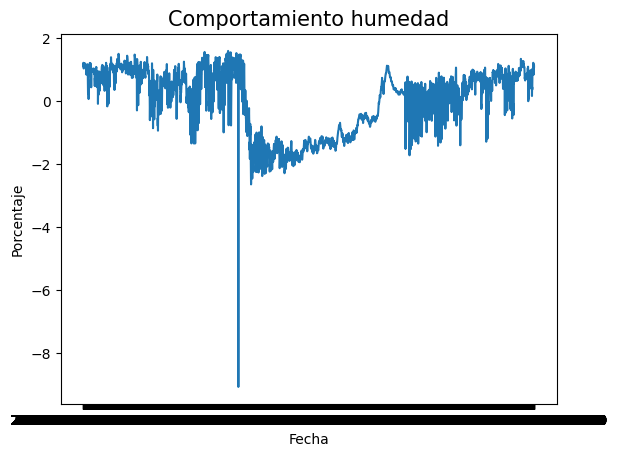

In [19]:
plt.plot(humidity.timestamp, humidity['humidity'])
plt.title('Comportamiento humedad', fontsize=15)
plt.xlabel('Fecha')
plt.ylabel('Porcentaje')
plt.show()

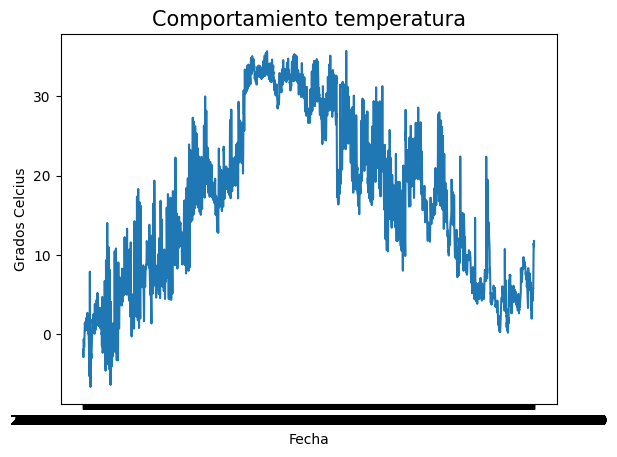

In [20]:
plt.plot(sensor1.timestamp, sensor1['temperature'])
plt.title('Comportamiento temperatura', fontsize=15)
plt.xlabel('Fecha')
plt.ylabel('Grados Celcius')
plt.show()

In [ ]:
plt.plot(weight.timestamp, weight['weight'])
plt.title('Comportamiento peso', fontsize=15)
plt.xlabel('Fecha')
plt.ylabel('Kilogramos')
plt.show()